## CS 454 HW 1 Parametric Classification

In [9]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from sklearn.metrics import confusion_matrix

In [2]:
train_data=pd.read_csv("C:/Users/mrt/Desktop/downloads/training.csv")
test_data=pd.read_csv("C:/Users/mrt/Desktop/downloads/testing.csv")

In [2]:
train_data.tail()

NameError: name 'train_data' is not defined

To classify X where x is age and r is associated car brand in a zero-one loss environment; 
Ci should be choosen if P(Ci|x)= max P(Cj|x) j=1,..,k

P(Ci|x)= (P(x|Ci)P(Ci))/P(x)

P(x|Ci)~N(μ(i),σ(i)²)= (1/sqrt(2*pi*σ(i)))*e^[-((x-μ(i))^2)/2*σ(i)²]

Parameters of P(x|Ci) and P(Ci) should be estimated by maximum likelihood. Parameters from mle are below.

m(i) = (Σ x*r(i)) / (Σ r(i)) where i=passat,golf,polo and Σ is from 1 to 100. r is 1 if x ∈ C(i), 0 otherwise.

s(i)^2 = (Σ (x-m(i))^2*r(i)) / (Σ r(i))

p(C(i)) = Σ r(i) / N  

In [4]:
len_data=len(train_data)
x_passat=0
x_golf=0
x_polo=0
num_passat=0
num_golf=0
num_polo=0
for i in range (len_data):
    if train_data.car_model[i]=="Passat":
        x_passat+=train_data.age[i]
        num_passat+=1
    elif train_data.car_model[i]=="Golf":
        x_golf+=train_data.age[i]
        num_golf+=1
    elif train_data.car_model[i]=="Polo":
        x_polo+=train_data.age[i]
        num_polo+=1

m_passat=x_passat/num_passat
m_golf=x_golf/num_golf
m_polo=x_polo/num_polo

In [5]:
error_passat=0
error_golf=0
error_polo=0

for i in range (len_data):
    if train_data.car_model[i]=="Passat":
        error_passat=error_passat+(train_data.age[i]-m_passat)**2
    elif train_data.car_model[i]=="Golf":
        error_golf=error_golf+(train_data.age[i]-m_golf)**2
    elif train_data.car_model[i]=="Polo":
        error_polo=error_polo+(train_data.age[i]-m_polo)**2    

s2_passat=error_passat/num_passat
s2_golf=error_golf/num_golf
s2_polo=error_polo/num_polo

In [7]:
prior_golf=num_golf/len_data
prior_passat=num_passat/len_data
prior_polo=num_polo/len_data

p(x|C(i)) graphs are below

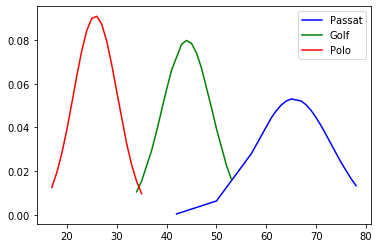

In [20]:
x_passat = np.sort(train_data[train_data.car_model=="Passat"].age.to_numpy())
x_golf = np.sort(train_data[train_data.car_model=="Golf"].age.to_numpy())
x_polo = np.sort(train_data[train_data.car_model=="Polo"].age.to_numpy())

likelihood_passat=1/(np.sqrt(2*np.pi)*np.sqrt(s2_passat))*np.exp(-((x_passat-m_passat)**2)/(2*s2_passat))
likelihood_golf=1/(np.sqrt(2*np.pi)*np.sqrt(s2_golf))*np.exp(-((x_golf-m_golf)**2)/(2*s2_golf))
likelihood_polo=1/(np.sqrt(2*np.pi)*np.sqrt(s2_polo))*np.exp(-((x_polo-m_polo)**2)/(2*s2_polo))

plt.plot(x_passat, likelihood_passat, '-b', label="Passat")
plt.plot(x_golf, likelihood_golf, '-g', label="Golf")
plt.plot(x_polo, likelihood_polo, '-r', label="Polo")
plt.legend(loc='upper right')

plt.show()

We can also use discriminant function rather than posterior of class.

gi(x) = p(x|C(i))*P(C(i)) equivalently gi(x)=log p(x|C(i)) + log P(C(i))

We assumed p(x|C(i)) are Gaussian and we estimated parameters and priors for each class.

In [21]:
def discriminant(x):
    g_passat=-0.5*np.log(2*np.pi)-np.log(np.sqrt(s2_passat))-((x-m_passat)**2)/(2*s2_passat)+np.log(prior_passat)
    g_golf=-0.5*np.log(2*np.pi)-np.log(np.sqrt(s2_golf))-((x-m_golf)**2)/(2*s2_golf)+np.log(prior_golf)
    g_polo=-0.5*np.log(2*np.pi)-np.log(np.sqrt(s2_polo))-((x-m_polo)**2)/(2*s2_polo)+np.log(prior_polo)
    
    return g_passat,g_golf,g_polo

In [22]:
y_train=[]
y_test=[]
for i in range(len_data):
   
    disc_test=discriminant(test_data.age[i])
    
    if max(disc_test)==disc_test[0]:
        y_test.append("Passat")
    elif max(disc_test)==disc_test[1]:
        y_test.append("Golf")
    elif max(disc_test)==disc_test[2]:
        y_test.append("Polo")
    
for i in range(len_data):
   
    disc_train=discriminant(train_data.age[i])   
    
    if max(disc_train)==disc_train[0]:
        y_train.append("Passat")
    elif max(disc_train)==disc_train[1]:
        y_train.append("Golf")
    elif max(disc_train)==disc_train[2]:
        y_train.append("Polo")


In [23]:
y_true=train_data.car_model.array
label=['Passat', 'Golf', 'Polo']

[[28  2  0]
 [ 0 28  2]
 [ 0  1 39]]


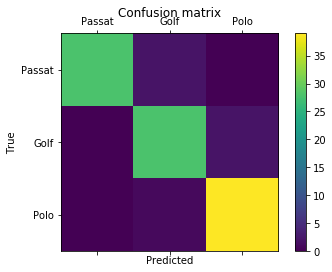

[[28  2  0]
 [ 3 27  0]
 [ 0  3 37]]


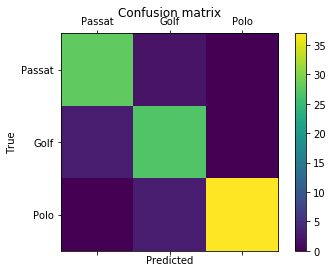

In [24]:
def conf_matrix(y_pred):
    labels = label
    cm = confusion_matrix(y_true, y_pred, labels=label)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
conf_matrix(y_train)
conf_matrix(y_test)